<a href="https://colab.research.google.com/github/Zikaelson/Image-watermarking-Using-Computer-Vision/blob/main/Image_Watermarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Watermaking using Computer Vision

In this project, we'll learn how to add a watermark to an image using OpenCV. Watermarking your images acts as a copyright, preventing others from using them without permission. We'll cover how to add both a logo and text as watermarks.

In [12]:
# Important library imports
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operations
import requests  # Requests for making HTTP requests to fetch images from the web
from PIL import Image  # PIL (Python Imaging Library) for image handling and manipulation


We will start by importing required libraries like OpenCV for image processing, numpy for mathematical computation, etc.

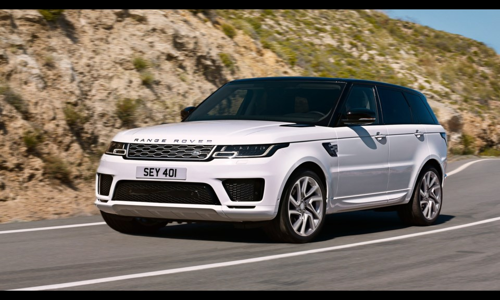

In [13]:
# Reading image from URL
image_url = 'https://www.vmcdn.ca/f/files/shared/feeds/automotive/2017/10/310382_2018_land_rover_range_rover_sport.jpg;w=960;h=640;bgcolor=000000'
response = requests.get(image_url, stream=True)  # Sending a GET request to the URL
image = Image.open(response.raw)  # Opening the image from the response

# Resizing the image for watermarking with logo
image_logow = image.resize((500, 300))  # Resize the image to 500x300 pixels

# Resizing the image for watermarking with text
image_textw = image.resize((500, 300))  # Resize the image to 500x300 pixels

# Display the resized image with logo watermarking
image_logow.show()  # Display the image


For this project we need an image url on which we will apply watermark. We will load the image using the url of the image from google images. You can use any image that you desire and replace the url of the image with current url. Next we will read and resize the image and finally store it into two variables for logo and text watermarking.

In [22]:
# Reading logo from URL
logo_url = 'https://pianalytix.com/wp-content/uploads/2020/05/cropped-pianalytiX-full-logo-square-2-209x52.png'
response = requests.get(logo_url, stream=True)  # Sending a GET request to the URL
logo = Image.open(response.raw)  # Opening the logo image from the response

# Display the logo image
logo.show()  # Display the logo image


For logo we are using Pianalytix logo which is downloaded using the above url.

In [15]:
# Convert the resized image with logo watermarking to a NumPy array and ensure it's in RGB format
image_logow = np.array(image_logow.convert('RGB'))

# Get the dimensions of the image
h_image, w_image, _ = image_logow.shape  # Height, width, and number of color channels of the image

# Convert the logo image to a NumPy array and ensure it's in RGB format
logo = np.array(logo.convert('RGB'))

# Get the dimensions of the logo
h_logo, w_logo, _ = logo.shape  # Height, width, and number of color channels of the logo


In order to use these images we will first convert them into rbg format and store it as a numpy array. Similarly, we will also extract the shape i.e. it's height and width.

In [16]:
# Get the center of the original image
center_y = int(h_image / 2)  # Calculate the y-coordinate of the center of the image
center_x = int(w_image / 2)  # Calculate the x-coordinate of the center of the image

# Calculate the top-left corner of the region where the watermark will be placed
top_y = center_y - int(h_logo / 2)  # Calculate the y-coordinate of the top edge of the watermark
left_x = center_x - int(w_logo / 2)  # Calculate the x-coordinate of the left edge of the watermark

# Calculate the bottom-right corner of the region where the watermark will be placed
bottom_y = top_y + h_logo  # Calculate the y-coordinate of the bottom edge of the watermark
right_x = left_x + w_logo  # Calculate the x-coordinate of the right edge of the watermark


We will place our watermark in the center of the image so for that we need to calculate the center of the image. Here, we will find out the center coordinates of the image using height and width of the image.

In [17]:
# # Get the region of interest (ROI) from the original image where the watermark will be placed
roi = image_logow[top_y: bottom_y, left_x: right_x]

# Add the logo to the ROI using addWeighted for blending
result = cv2.addWeighted(roi, 1, logo, 1, 0)

# Draw guiding lines (optional) - horizontal lines through the center
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)  # Line from the left edge to the left edge of the watermark
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)  # Line from the right edge of the watermark to the right edge of the image

# Replace the ROI on the image with the result (blended logo)
image_logow[top_y: bottom_y, left_x: right_x] = result


A Region of Interest defined as the area we need to place our watermark on. Here, we will find out ROI using the coordinates we found above. Next we will use OpenCV to merge our logo on ROI. Similarly we will also add a line or a pattern on our image.

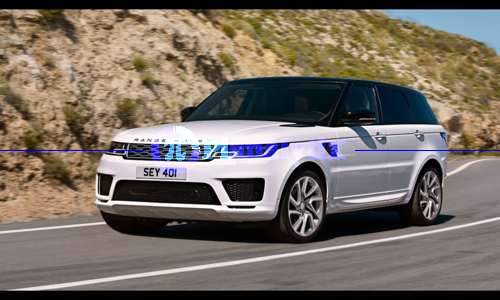

In [18]:
# Convert the NumPy array (image with logo watermark) back to a PIL image
img = Image.fromarray(image_logow, 'RGB')

# Display the image
img.show()  # This will open the image in the default image viewer


Now we will convert the image from array to RGB and visualize it.

In [19]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))  # Convert the resized image for text watermarking to a NumPy array and ensure it's in RGB format

# Add text watermark using OpenCV's putText function
cv2.putText(
    image_text,  # Image on which to put the text
    text='Pianalytix',  # The text to be added as watermark
    org=(w_image - 95, h_image - 10),  # Bottom-left corner of the text string in the image
    fontFace=cv2.FONT_HERSHEY_COMPLEX,  # Font type
    fontScale=0.5,  # Font scale (size)
    color=(0, 0, 255),  # Text color in BGR format (red in this case)
    thickness=2,  # Thickness of the text
    lineType=cv2.LINE_4  # Type of the line used to draw the text
)

Next we shall see how we can use a text as a watermark. We will convert our image into RGB and save it as a numpy array. To put a text as a watermark we will be using putText() function of OpenCV. Here we can use different features like size of the text, thickness of the text, font family, etc.

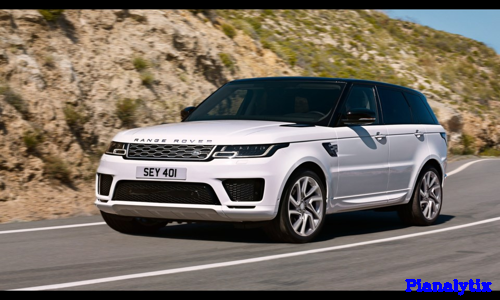

In [20]:
# Plotting text watermark image

# Convert the NumPy array (image with text watermark) back to a PIL image
timg = Image.fromarray(image_text, 'RGB')

# Display the image
timg.show()  # This will open the image in the default image viewer


To visualize the image we need to convert it back to RGB format.

## Conclusion:

Adding a watermark to an image serves as a copyright measure. Organizations can use this technique to protect their content, ensuring it is not misused without proper licensing or purchase. In this project, we demonstrated how to use OpenCV to effortlessly add watermarks to images.